In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
# os.chdir('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao/Remove_pvl0_v3_ttsplit')
os.chdir(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao\Remove_pvl0_v3_ttsplit")

types = ['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']

In [8]:
with open(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao\Remove_pvl0_v3_ttsplit\lambda_decision_ignore_section\v3_lambda_decision_new.json", 'r') as f:
    opt_lmbd_dict = json.load(f)
opt_lmbd_dict

{'B': 0.0014677992676220707,
 'CD4_T': 0.014677992676220709,
 'CD8_T': 0.0021544346900318864,
 'DC': 0.0014677992676220707,
 'Mono': 0.006812920690579619,
 'NK': 0.0021544346900318864,
 'other': 0.004641588833612781,
 'other_T': 0.0006812920690579617}

In [9]:
feature_no = {}

for celltype in types:
    print(celltype)
    with open(f'./{celltype}/{celltype}_tuning.json') as f:
        tuning = json.load(f)
    
    opt_lmbd = opt_lmbd_dict[celltype]
    log_opt_lmbd = np.log(opt_lmbd)
    # print(log_opt_lmbd)

    log_lambda_range = tuning['log_lambda_range']
    idx = log_lambda_range.index(log_opt_lmbd)
    # print(idx)

    feature_no_celltype = int(tuning['Feature_number'][idx])
    feature_no[celltype] = feature_no_celltype


B
CD4_T
CD8_T
DC
Mono
NK
other
other_T


In [10]:
feature_no

{'B': 17,
 'CD4_T': 1794,
 'CD8_T': 24,
 'DC': 18,
 'Mono': 17,
 'NK': 28,
 'other': 4,
 'other_T': 76}

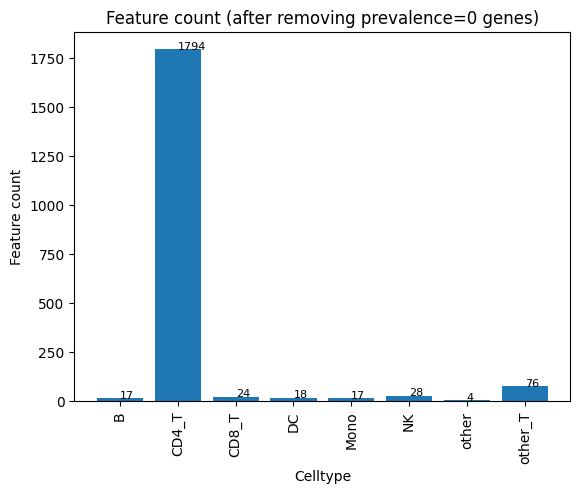

In [11]:
# plt.bar(feature_no_df['Celltype'], feature_no_df['Features'])
plt.bar(feature_no.keys(), feature_no.values())

# Add the values to each bar
for i, v in feature_no.items():
    plt.text(i, v, str(v), fontsize=8)

# Set the x-axis label
plt.xlabel('Celltype')
plt.xticks(rotation=90)

# Set the y-axis label
plt.ylabel('Feature count')

plt.title('Feature count (after removing prevalence=0 genes)')
# Show the plot
plt.show()

In [12]:
# find the loss at the optimal lambda
loss_dict = {}

for celltype in types:
    print(celltype)
    with open(f'./{celltype}/{celltype}_tuning.json') as f:
        tuning = json.load(f)
    
    opt_lmbd = opt_lmbd_dict[celltype]
    log_opt_lmbd = np.log(opt_lmbd)
    # print(log_opt_lmbd)

    log_lambda_range = tuning['log_lambda_range']
    idx = log_lambda_range.index(log_opt_lmbd)
    # print(idx)

    loss_celltype = tuning['loss_history'][idx]
    print(loss_celltype)
    loss_dict[celltype] = loss_celltype


B
0.03611991927027702
CD4_T
0.5909799933433533
CD8_T
0.1357104629278183
DC
0.0379369780421257
Mono
0.12945568561553955
NK
0.08684121072292328
other
0.05821145325899124
other_T
0.07509613037109375


In [13]:
loss_dict

{'B': 0.03611991927027702,
 'CD4_T': 0.5909799933433533,
 'CD8_T': 0.1357104629278183,
 'DC': 0.0379369780421257,
 'Mono': 0.12945568561553955,
 'NK': 0.08684121072292328,
 'other': 0.05821145325899124,
 'other_T': 0.07509613037109375}

In [14]:
# 25th percentile of the loss
np.percentile(list(loss_dict.values()), 25)

0.05314283445477486

## Hypothesize: CD4_T optimal lambda is at 0.01 instead of 0.01468

In [16]:
with open(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao\Remove_pvl0_v3_ttsplit\lambda_decision_ignore_section\v3_lambda_decision_new_cd4.json", 'r') as f:
    opt_lmbd_dict_cd4 = json.load(f)
print(opt_lmbd_dict_cd4)

# find the loss at the optimal lambda
loss_dict2 = {}

for celltype in types:
    print(celltype)
    with open(f'./{celltype}/{celltype}_tuning.json') as f:
        tuning = json.load(f)
    
    opt_lmbd = opt_lmbd_dict_cd4[celltype]
    log_opt_lmbd = np.log(opt_lmbd)
    # print(log_opt_lmbd)

    log_lambda_range = tuning['log_lambda_range']
    idx = log_lambda_range.index(log_opt_lmbd)
    # print(idx)

    loss_celltype = tuning['loss_history'][idx]
    print(loss_celltype)
    loss_dict2[celltype] = loss_celltype


{'B': 0.0014677992676220707, 'CD4_T': 0.010000000000000004, 'CD8_T': 0.0021544346900318864, 'DC': 0.0014677992676220707, 'Mono': 0.006812920690579619, 'NK': 0.0021544346900318864, 'other': 0.004641588833612781, 'other_T': 0.0006812920690579617}
B
0.03611991927027702
CD4_T
0.3526456654071808
CD8_T
0.1357104629278183
DC
0.0379369780421257
Mono
0.12945568561553955
NK
0.08684121072292328
other
0.05821145325899124
other_T
0.07509613037109375


In [17]:
loss_dict2

{'B': 0.03611991927027702,
 'CD4_T': 0.3526456654071808,
 'CD8_T': 0.1357104629278183,
 'DC': 0.0379369780421257,
 'Mono': 0.12945568561553955,
 'NK': 0.08684121072292328,
 'other': 0.05821145325899124,
 'other_T': 0.07509613037109375}

In [18]:
# 25th percentile of the loss
np.percentile(list(loss_dict2.values()), 25)

0.05314283445477486

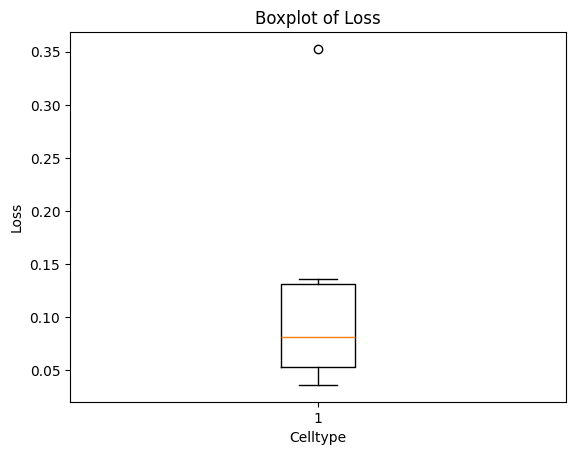

In [21]:
import matplotlib.pyplot as plt

plt.boxplot(list(loss_dict2.values()))
plt.xlabel('Celltype')
plt.ylabel('Loss')
plt.title('Boxplot of Loss')
plt.show()
